In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

plt.rcParams['figure.figsize'] = (10, 5)
sns.set(style="whitegrid")

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [2]:
hour_df = pd.read_csv("hour.csv")
day_df = pd.read_csv("day.csv")

print("Loaded hour.csv — shape:", hour_df.shape)
print("Loaded day.csv — shape:", day_df.shape)

# Show first rows
display(Markdown("### Hour Dataset Head"))
display(hour_df.head())

display(Markdown("### Day Dataset Head"))
display(day_df.head())

Loaded hour.csv — shape: (17379, 17)
Loaded day.csv — shape: (731, 16)


### Hour Dataset Head

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Day Dataset Head

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
def basic_clean(df, name="df"):
    df = df.copy()
    df.columns = [c.strip() for c in df.columns.astype(str)]
    print(f"\n{name} shape: {df.shape}")
    print("Null values per column:")
    print(df.isnull().sum())
    print("Duplicate rows:", df.duplicated().sum())
    if "dteday" in df.columns:
        df["dteday"] = pd.to_datetime(df["dteday"], errors="coerce")
        print(f"Parsed 'dteday' — Nulls:", df["dteday"].isnull().sum())
    return df
hour_df = basic_clean(hour_df, "hour_df")
day_df = basic_clean(day_df, "day_df")


hour_df shape: (17379, 17)
Null values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate rows: 0
Parsed 'dteday' — Nulls: 0

day_df shape: (731, 16)
Null values per column:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Duplicate rows: 0
Parsed 'dteday' — Nulls: 0


In [9]:
def fix_date_like_columns(df, cols):
    for c in cols:
        if c in df.columns:
            if np.issubdtype(df[c].dtype, np.datetime64):
                try:
                    df[c] = df[c].dt.day.astype("Int64")
                except:
                    df[c] = df[c].astype("Int64")
    return df


check_cols = ["weekday", "workingday", "holiday"]

hour_df = fix_date_like_columns(hour_df, check_cols)
day_df = fix_date_like_columns(day_df, check_cols)
for df, name in [(hour_df, "hour_df"), (day_df, "day_df")]:
    for col in df.columns:
        if df[col].dtype == object:
            if df[col].dropna().apply(lambda x: str(x).replace('.', '', 1).isdigit()).all():
                df[col] = pd.to_numeric(df[col], errors="ignore")

print("\nUpdated dtypes (hour_df):")
display(hour_df.dtypes.head(20))

print("\nUpdated dtypes (day_df):")
display(day_df.dtypes.head(20))



Updated dtypes (hour_df):


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


Updated dtypes (day_df):


instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [8]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"], errors="coerce")
day_df["dteday"] = pd.to_datetime(day_df["dteday"], errors="coerce")

# Select day-level attributes (exclude instant & dteday)
day_cols = [c for c in day_df.columns if c not in ("instant", "dteday")]

merged_df = hour_df.merge(
    day_df[["dteday"] + day_cols],
    on="dteday",
    how="left",
    suffixes=("_hour", "_day")
)

print("hour_df shape:", hour_df.shape)
print("day_df shape:", day_df.shape)
print("merged_df shape:", merged_df.shape)

display(Markdown("### Merged Dataset Head"))
display(merged_df.head())

hour_df shape: (17379, 17)
day_df shape: (731, 16)
merged_df shape: (17379, 31)


### Merged Dataset Head

,instant,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985



📌 Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.000000,4345.500000,8690.000000,13034.500000,17379.000000
season_hour,17379.0,2.501640,1.106918,1.000000,2.000000,3.000000,3.000000,4.000000
yr_hour,17379.0,0.502561,0.500008,0.000000,0.000000,1.000000,1.000000,1.000000
mnth_hour,17379.0,6.537775,3.438776,1.000000,4.000000,7.000000,10.000000,12.000000
hr,17379.0,11.546752,6.914405,0.000000,6.000000,12.000000,18.000000,23.000000
holiday_hour,17379.0,0.028770,0.167165,0.000000,0.000000,0.000000,0.000000,1.000000
weekday_hour,17379.0,3.003683,2.005771,0.000000,1.000000,3.000000,5.000000,6.000000
workingday_hour,17379.0,0.682721,0.465431,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit_hour,17379.0,1.425283,0.639357,1.000000,1.000000,1.000000,2.000000,4.000000
temp_hour,17379.0,0.496987,0.192556,0.020000,0.340000,0.500000,0.660000,1.000000


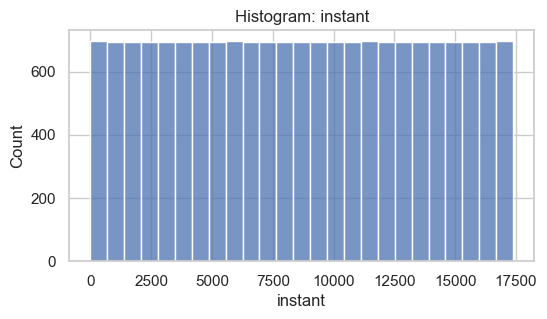

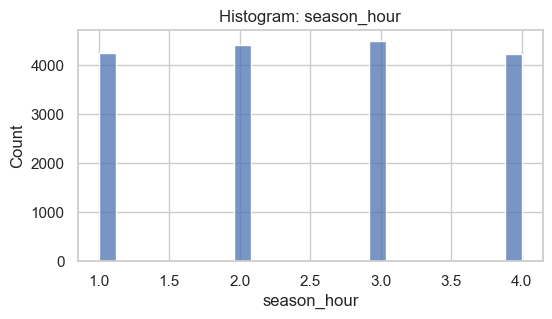

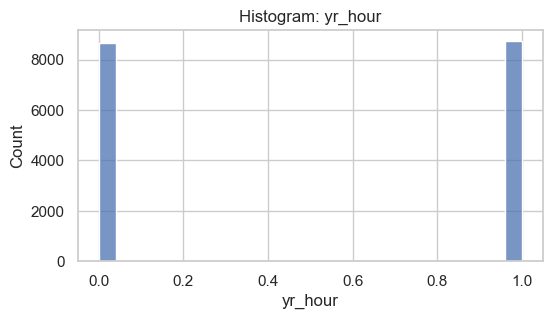

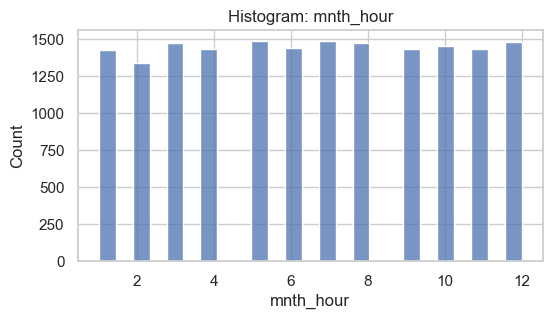

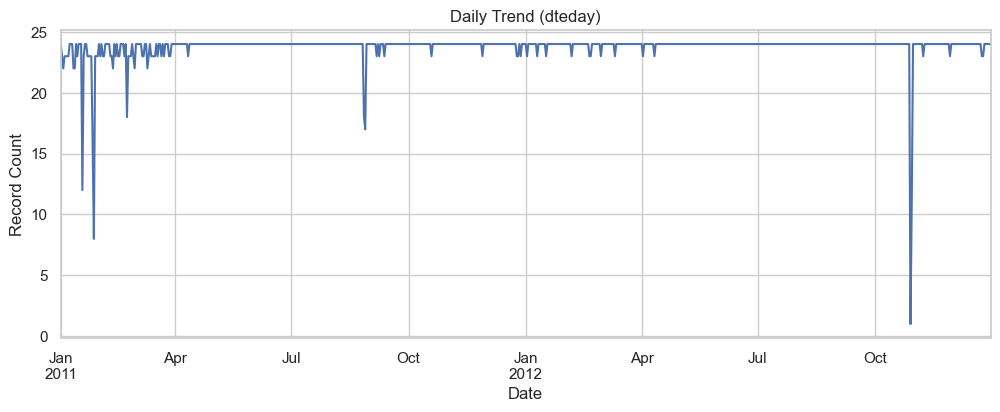

In [10]:
print("\n📌 Summary Statistics:")
numeric_df = merged_df.select_dtypes(include=["int64", "float64"])
display(numeric_df.describe().T)
first_cols = numeric_df.columns[:4]

for col in first_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(merged_df[col], bins=25)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
date_columns = merged_df.select_dtypes(include=["datetime64[ns]"]).columns

if len(date_columns) > 0:
    d = date_columns[0]
    trend = merged_df.set_index(d).resample("D").size()

    plt.figure(figsize=(12, 4))
    trend.plot()
    plt.title(f"Daily Trend ({d})")
    plt.ylabel("Record Count")
    plt.xlabel("Date")
    plt.show()
else:
    print("No datetime column available for time-series plot.")